<a href="https://colab.research.google.com/github/bowie0713/DS-Project-1/blob/main/Copy_of_Three_Point_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import copy
import seaborn as sns

In [ ]:
nba_df = pd.read_csv("NBA three point stats baseball ref.csv")
nba_df.head()

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2022-23,NBA,26.1,6-Jun,216.0,1145,241.8,41.9,88.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,2,2021-22,NBA,26.1,6-Jun,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2020-21,NBA,26.1,6-Jun,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2019-20,NBA,26.1,6-Jun,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2018-19,NBA,26.3,6-Jun,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


In [ ]:
# nba_df['Season'] = ['2022','2021','2020','2019','2018','2017', '']
nba_df['Season'] = np.arange(start = 2023, stop = 1946, step = -1)
nba_df

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2023,NBA,26.1,6-Jun,216.0,1145,241.8,41.9,88.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,2,2022,NBA,26.1,6-Jun,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2021,NBA,26.1,6-Jun,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2020,NBA,26.1,6-Jun,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2019,NBA,26.3,6-Jun,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,1951,NBA,NaN,NaN,NaN,354,NaN,29.8,83.6,...,84.1,0.357,NaN,0.733,NaN,0.357,NaN,NaN,0.293,NaN
73,74,1950,NBA,NaN,NaN,NaN,561,NaN,28.2,83.1,...,80.0,0.340,NaN,0.714,NaN,0.340,NaN,NaN,0.284,NaN
74,75,1949,BAA,NaN,NaN,NaN,360,NaN,29.0,88.7,...,80.0,0.327,NaN,0.703,NaN,0.327,NaN,NaN,0.248,NaN
75,76,1948,BAA,NaN,NaN,NaN,192,NaN,27.2,96.0,...,72.7,0.284,NaN,0.675,NaN,0.284,NaN,NaN,0.190,NaN


Since three point doesn't start until 1980, we'll drop the stats prior to the year 1980. 

In [ ]:
nba_df = nba_df.drop(index = nba_df.index[2023-1979:])
nba_df.head()

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2023,NBA,26.1,6-Jun,216.0,1145,241.8,41.9,88.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,2,2022,NBA,26.1,6-Jun,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2021,NBA,26.1,6-Jun,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2020,NBA,26.1,6-Jun,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2019,NBA,26.3,6-Jun,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


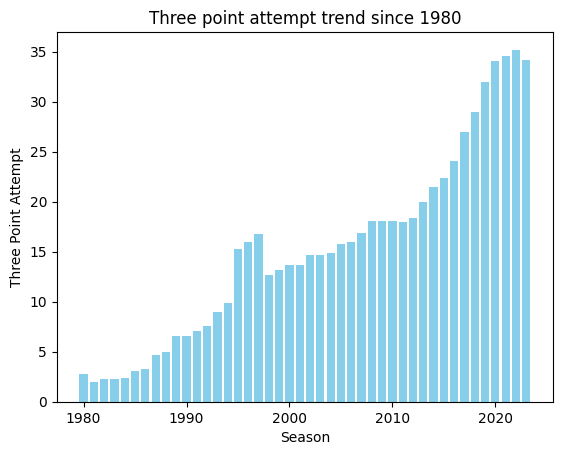

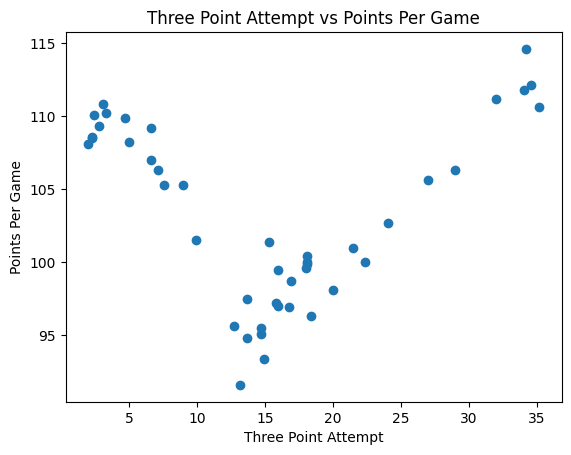

In [ ]:
plt.bar(x = nba_df['Season'], height = nba_df['3PA'], color = 'skyblue')
plt.title('Three point attempt trend since 1980')
plt.xlabel('Season')
plt.ylabel('Three Point Attempt')
plt.show()

plt.scatter(x = nba_df['3PA'], y = nba_df['PTS'])
plt.title('Three Point Attempt vs Points Per Game')
plt.xlabel('Three Point Attempt')
plt.ylabel('Points Per Game')
plt.show()

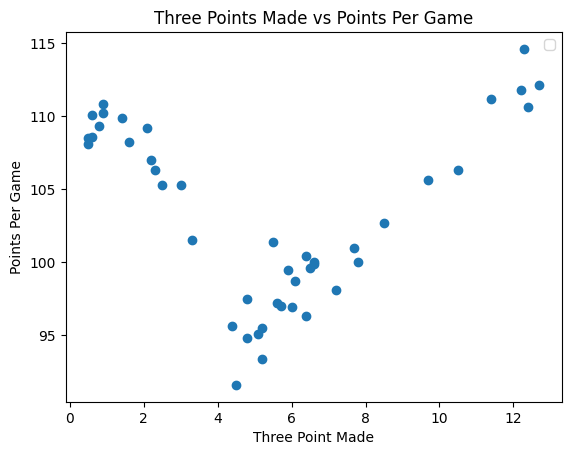

In [ ]:
plt.scatter(x = nba_df['3P'], y = nba_df['PTS'])
plt.title('Three Points Made vs Points Per Game')
plt.xlabel('Three Point Made')
plt.ylabel('Points Per Game')
plt.legend()

In [ ]:
nba_df = nba_df.drop(['Rk','Season','Lg','Age','Ht','Wt','G','MP' ], axis = 1) # Drop categorical data or data that are other wise useless by columns
nba_df.head()

,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,41.9,88.2,12.3,34.2,18.5,23.6,10.4,33.0,43.4,25.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,40.6,88.1,12.4,35.2,16.9,21.9,10.3,34.1,44.5,24.6,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,41.2,88.4,12.7,34.6,17.0,21.8,9.8,34.5,44.3,24.8,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,40.9,88.8,12.2,34.1,17.9,23.1,10.1,34.8,44.8,24.4,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,41.1,89.2,11.4,32.0,17.7,23.1,10.3,34.8,45.2,24.6,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


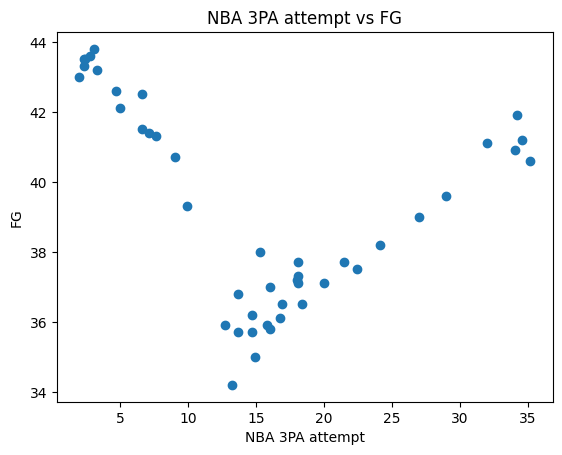

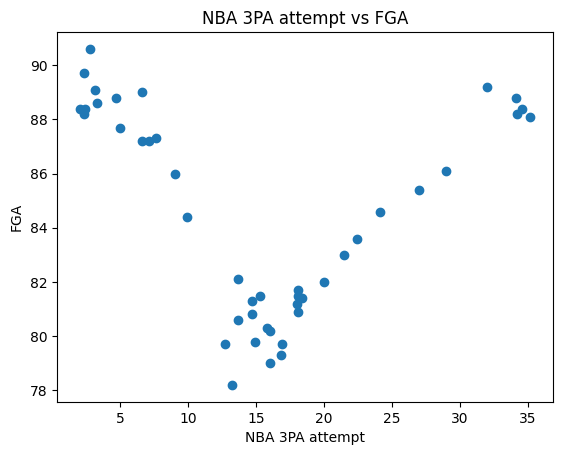

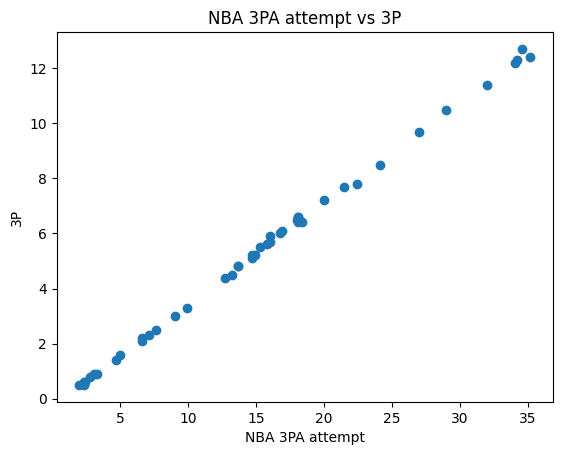

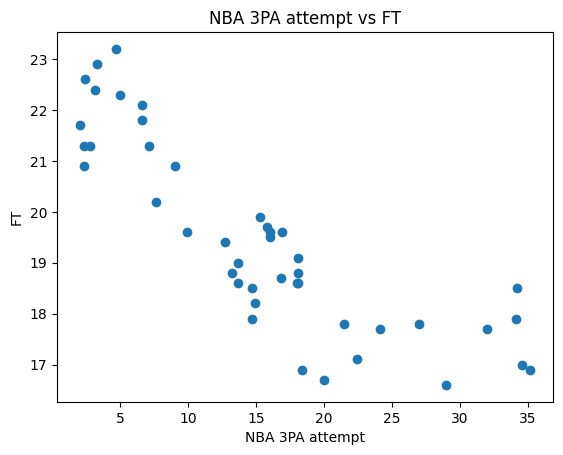

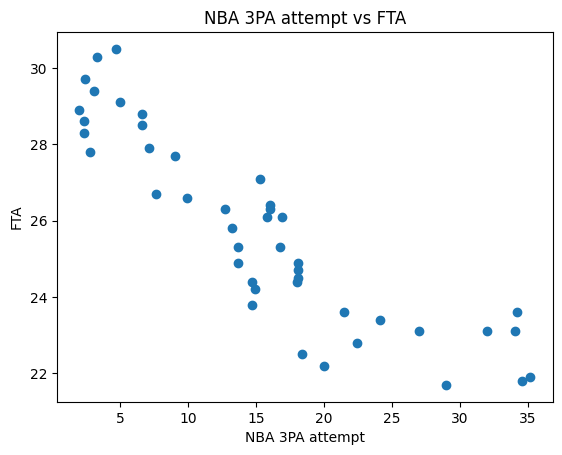

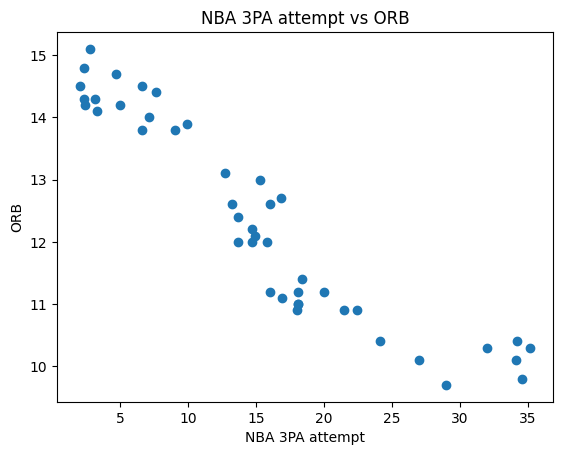

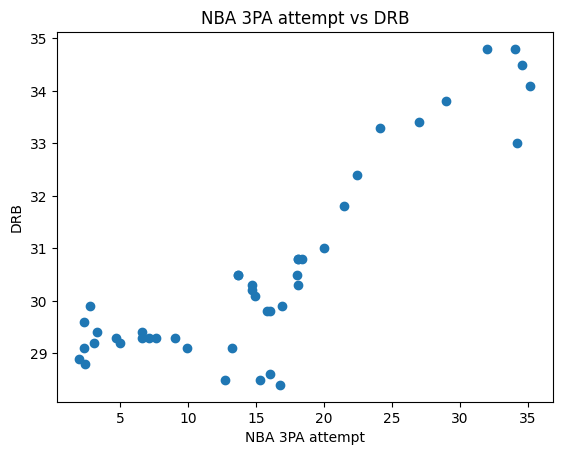

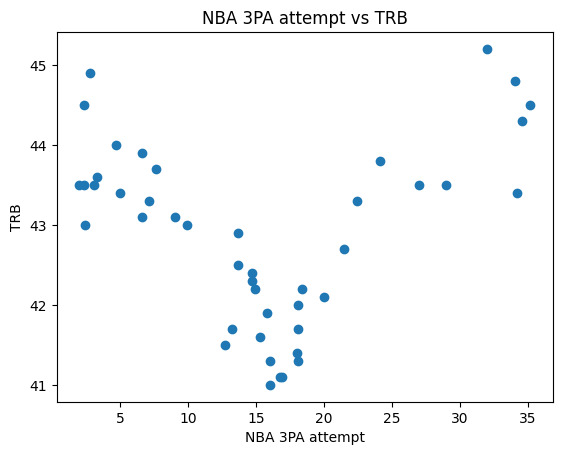

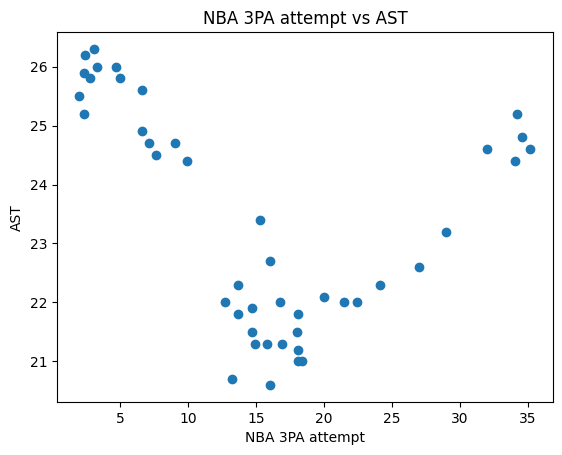

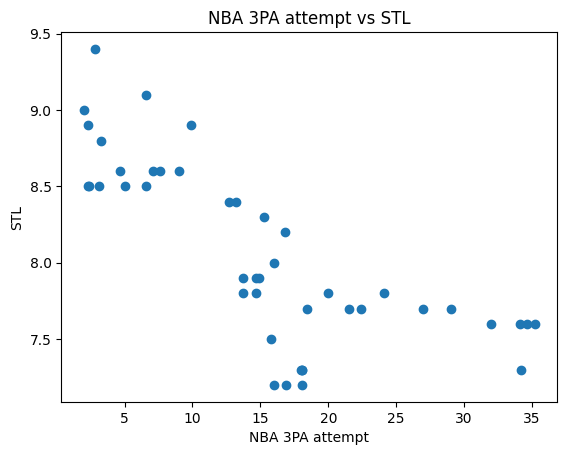

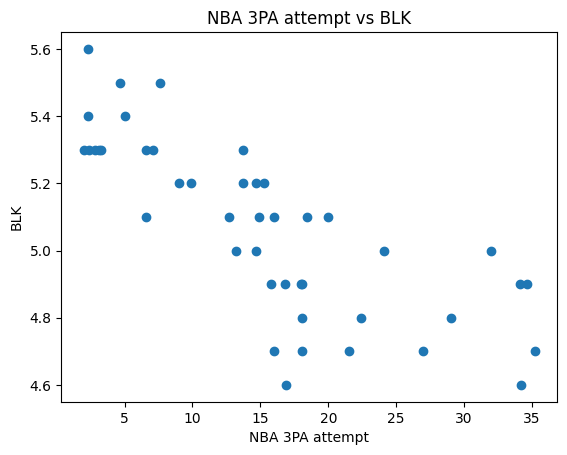

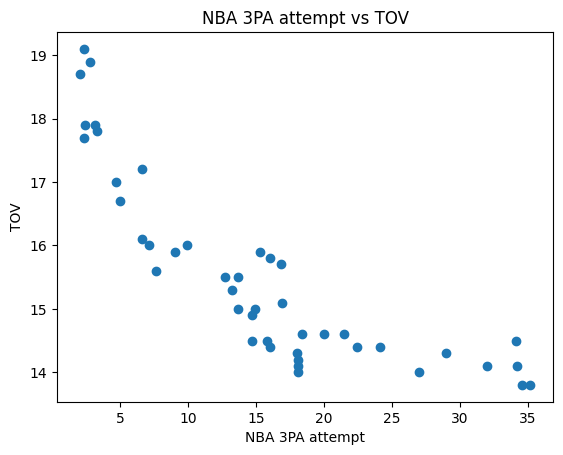

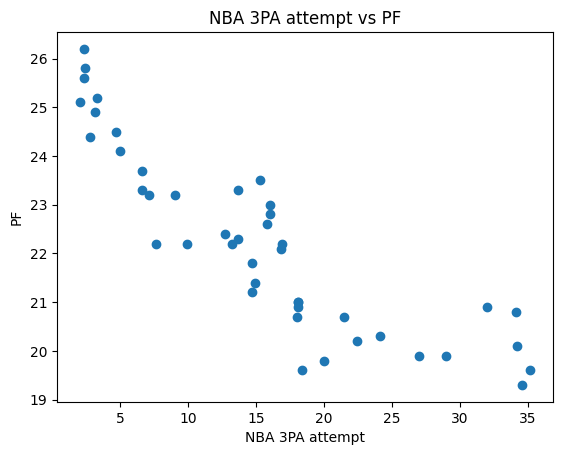

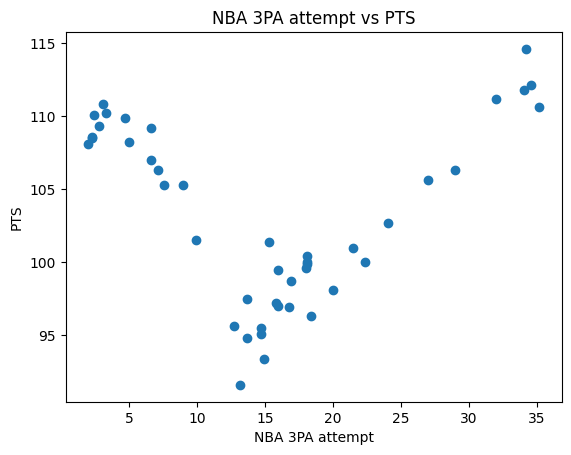

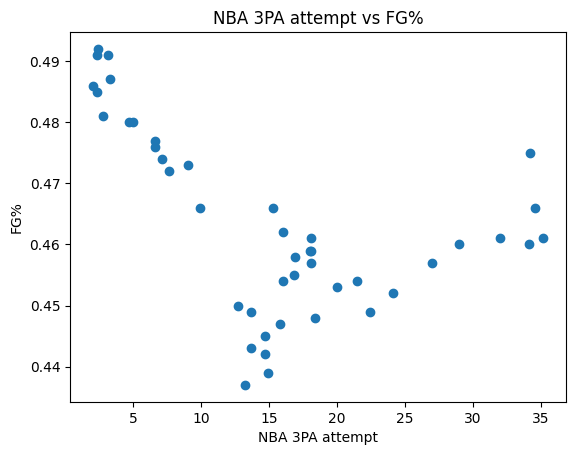

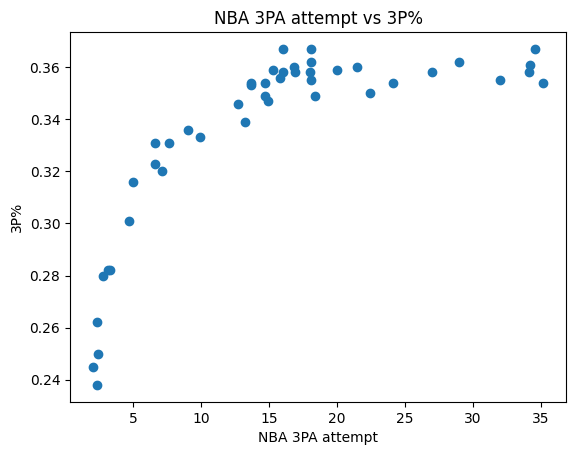

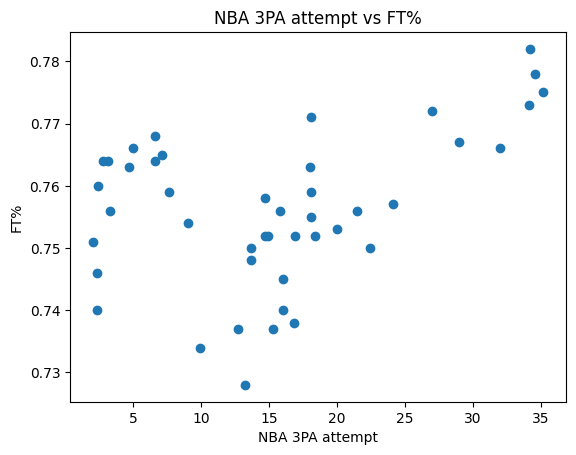

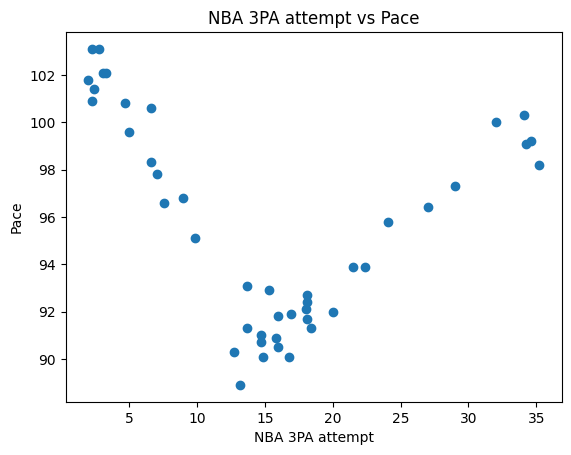

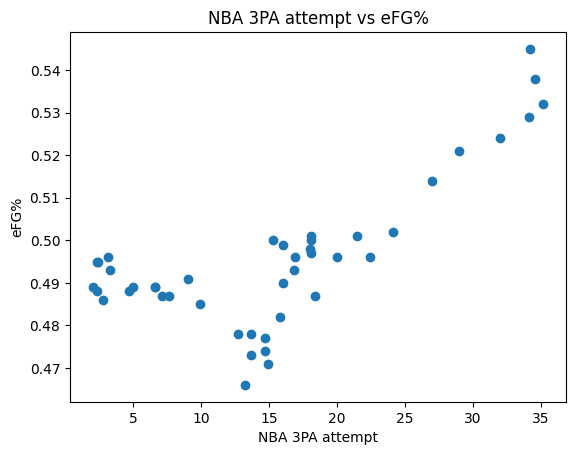

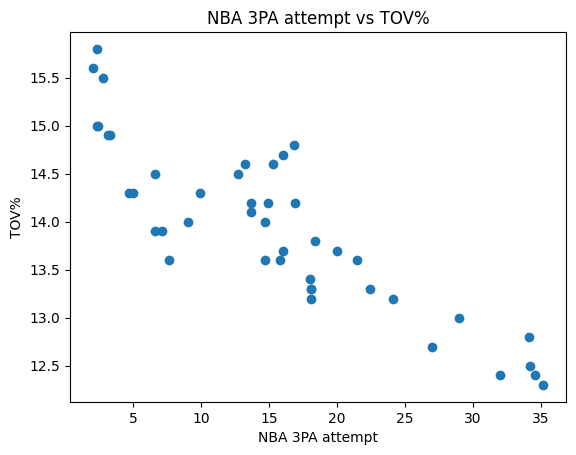

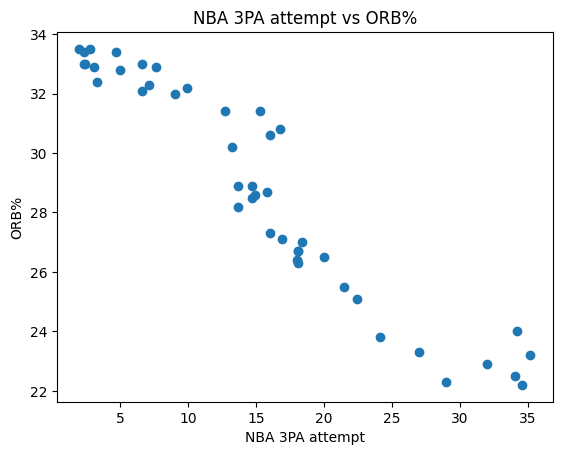

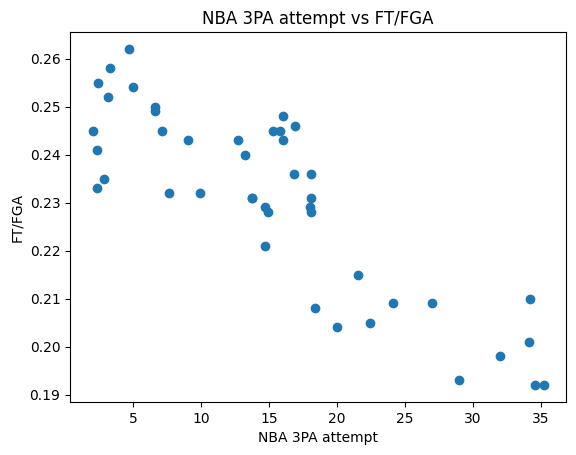

In [ ]:
count = 0
for label in nba_df.columns[:-1]:
  if label == '3PA':
    count += 1
  else:
    plt.scatter(nba_df['3PA'], nba_df[label])
    plt.title('NBA 3PA attempt vs ' + label)
    plt.xlabel('NBA 3PA attempt')
    plt.ylabel(label)
    plt.show()

In [ ]:
train, valid, test = np.split(nba_df.sample(frac = 1), [int(0.6*len(nba_df)), int(0.8*len(nba_df))])

In [ ]:
def get_xy(dataframe, x_label, y_labels= None):
  dataframe = copy.deepcopy(dataframe)
  if y_labels is None: # if the default y_label value is None
    y = dataframe[[c for c in dataframe.columns if c!= x_label]].values
  else:
    if len(y_labels) ==1:
      y = dataframe[y_labels[0]].values.reshape(-1,1)
    else:
      y = dataframe[y_labels].values

  x = dataframe[x_label].values.reshape(-1,1)
  data = np.hstack((x,y))

  return data, x, y

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
d, x_train_pts, y_train_pts = get_xy(train, x_label = '3PA', y_labels = ['PTS'])
d, x_val_pts, y_val_pts = get_xy(valid, x_label = '3PA', y_labels = ['PTS'])
d, x_test_pts, y_test_pts = get_xy(test, x_label = '3PA', y_labels = ['PTS'])

In [ ]:
pts_3pa_reg = LinearRegression()
pts_3pa_reg.fit(x_train_pts, y_train_pts)

LinearRegression()

In [ ]:
print(pts_3pa_reg.coef_)
print(pts_3pa_reg.intercept_)

[[0.02340021]]
[102.44228905]


In [ ]:
pts_3pa_reg.score(x_test_pts, y_test_pts)

-0.03507699801968989

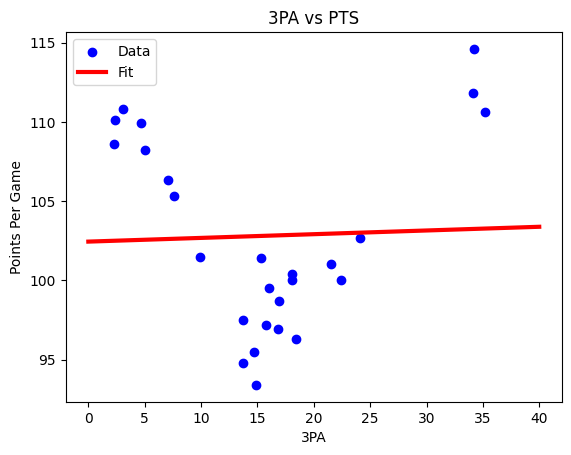

In [ ]:
import tensorflow as tf
plt.scatter(x_train_pts, y_train_pts, label = 'Data',color = 'blue')
x = tf.linspace(0, 40, 100)
plt.plot(x, pts_3pa_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color = 'red', linewidth = 3)
plt.legend()
plt.title("3PA vs PTS")
plt.ylabel("Points Per Game")
plt.xlabel("3PA")
plt.show()

# Multiple Linear Regression

In [ ]:
train, valid, test = np.split(nba_df.sample(frac = 1), [int(0.6*len(nba_df)), int(0.8*len(nba_df))])

In [ ]:
d, x_train_all, y_train_all = get_xy(train, x_label = '3PA', y_labels = nba_df.columns[5:]) #variables after 
d, x_val_all, y_val_all = get_xy(valid, x_label = '3PA', y_labels = nba_df.columns[5:])
d, x_test_all, y_test_all = get_xy(test, x_label = '3PA', y_labels = nba_df.columns[5:])

In [ ]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(x_test_all, y_test_all)

0.3868981183752507

# Linear Regression with Scatter Graphs

In [ ]:
nba_reg = LinearRegression()

R^2:  0.7140105019863106


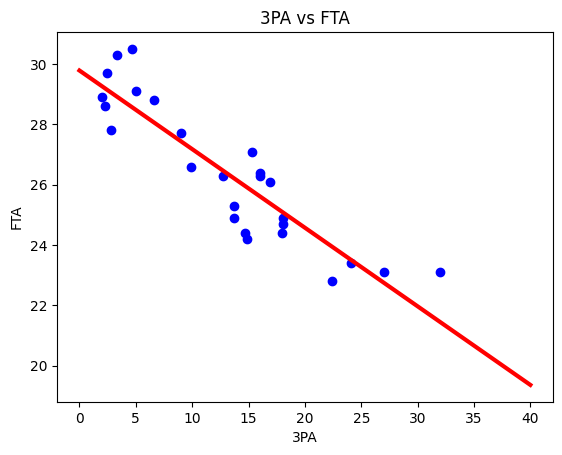

R^2:  0.8613829885757878


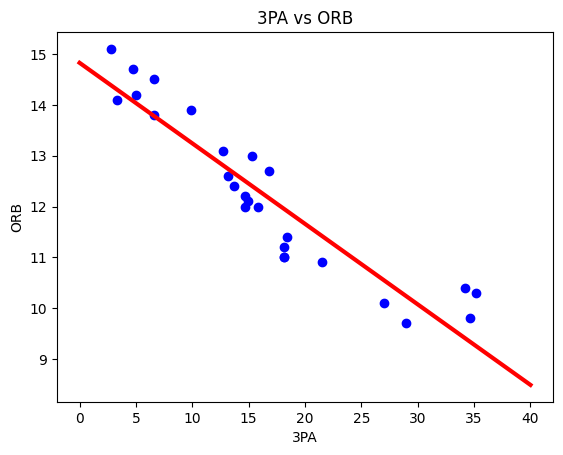

R^2:  0.7406052783947858


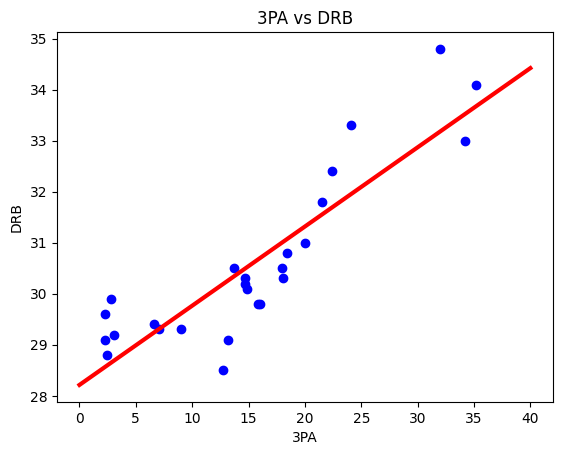

R^2:  -0.2663606302341992


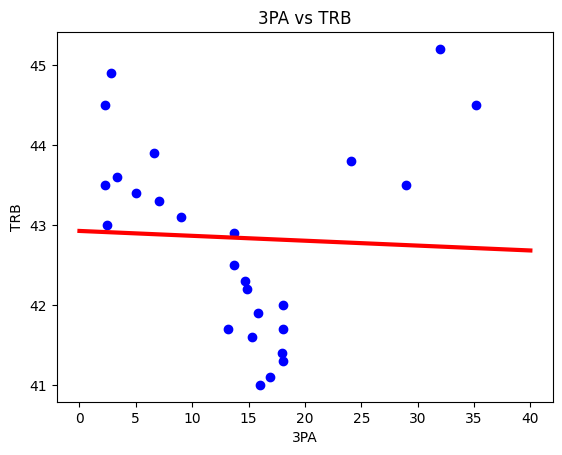

R^2:  0.09133729927945566


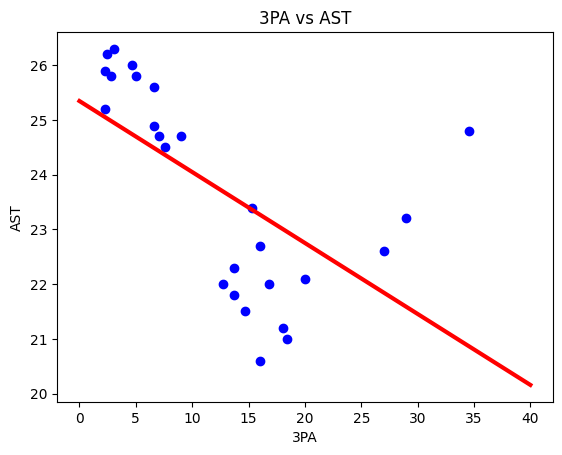

R^2:  0.6154386517834849


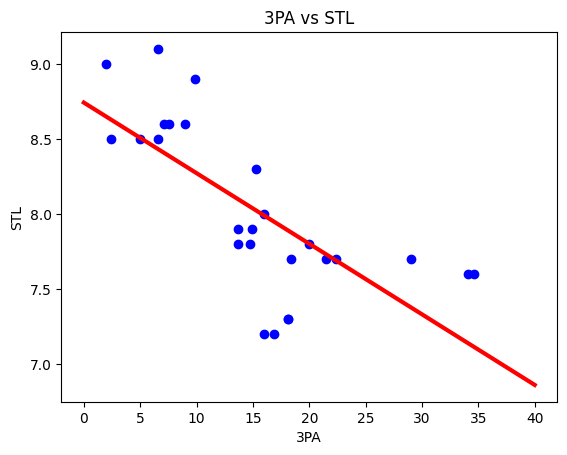

R^2:  -0.6075790637267175


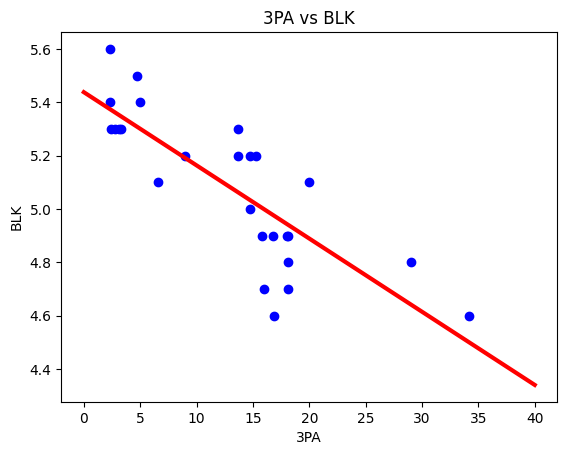

R^2:  0.7040343138618331


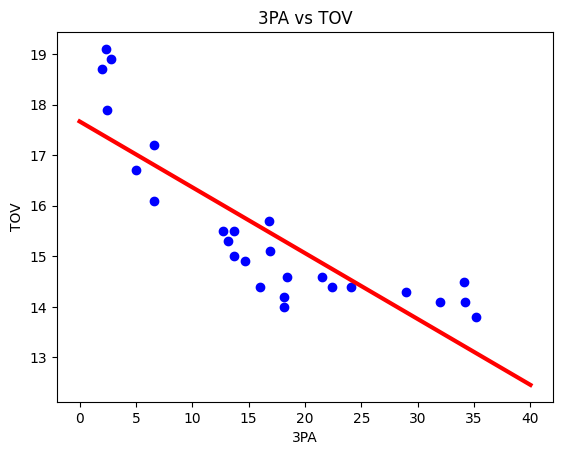

R^2:  0.657545913346691


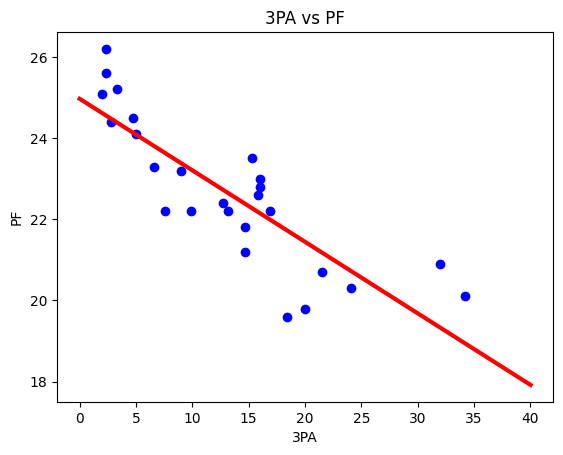

R^2:  -0.008851691855843669


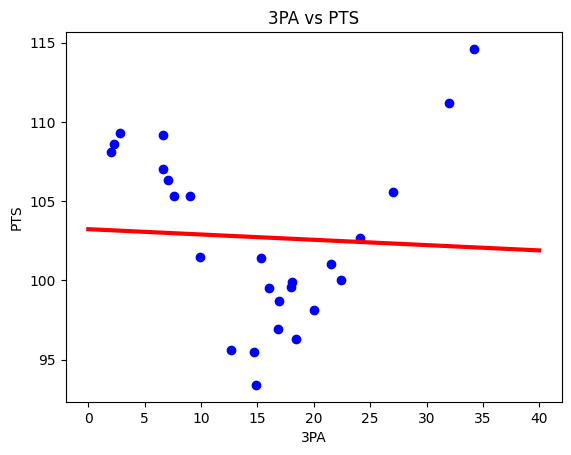

R^2:  0.026094968259450124


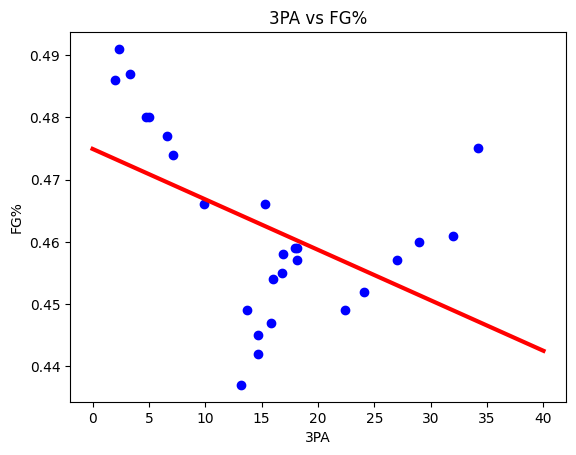

R^2:  0.5787785069081643


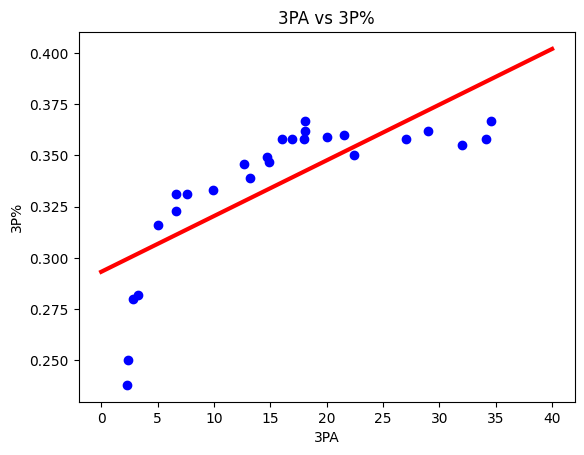

R^2:  -0.09885216540262398


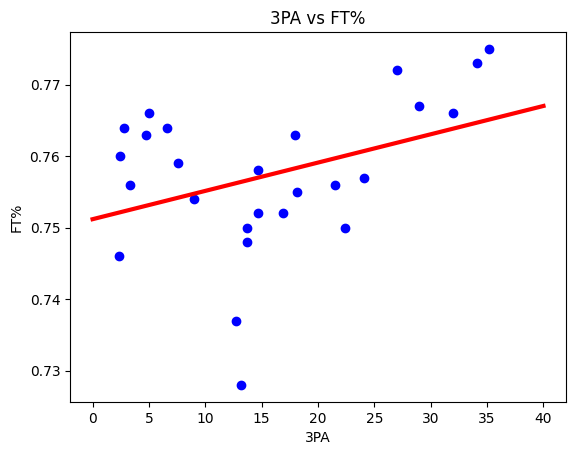

R^2:  -0.4152156667604181


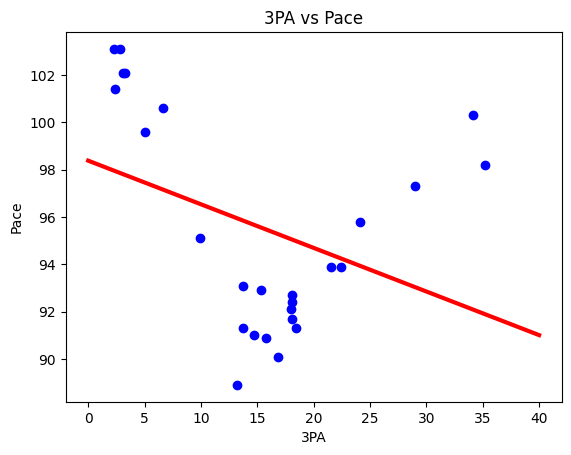

R^2:  0.25500302784165585


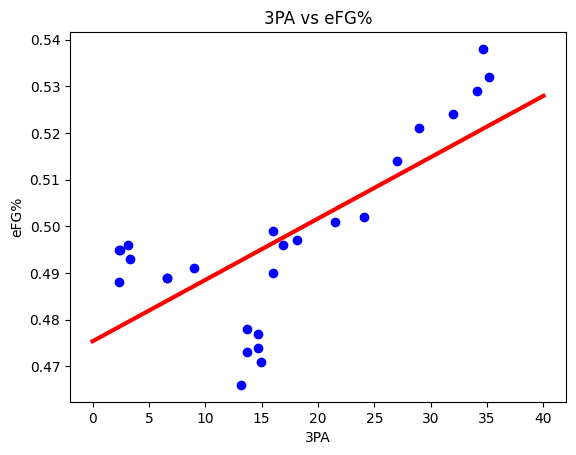

R^2:  0.8746931109671657


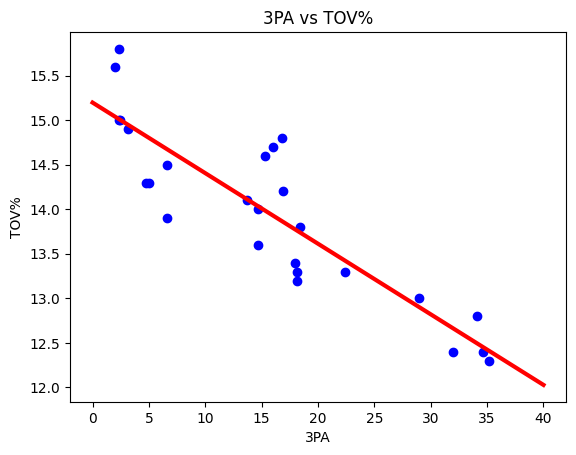

R^2:  0.9293548371347443


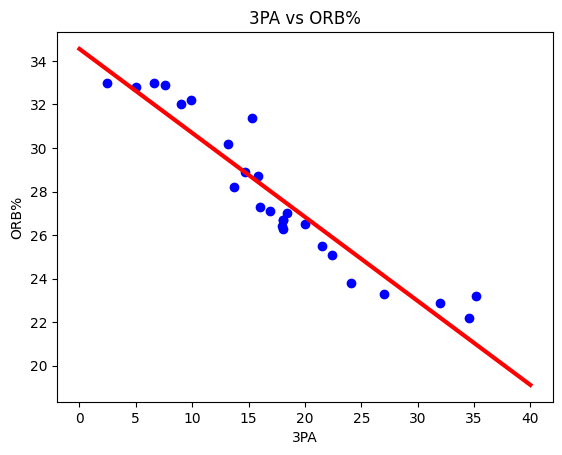

R^2:  0.744987610851899


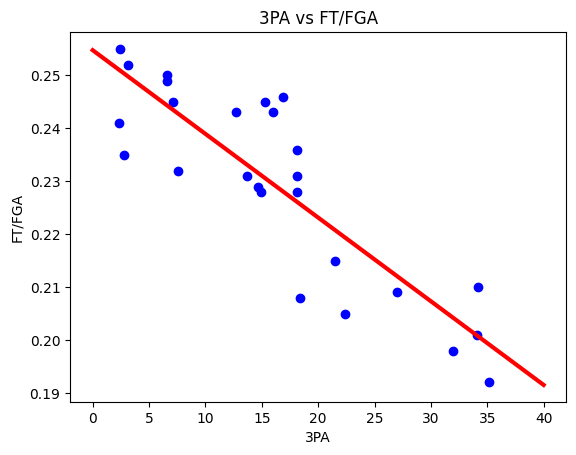

R^2:  0.18867499867374216


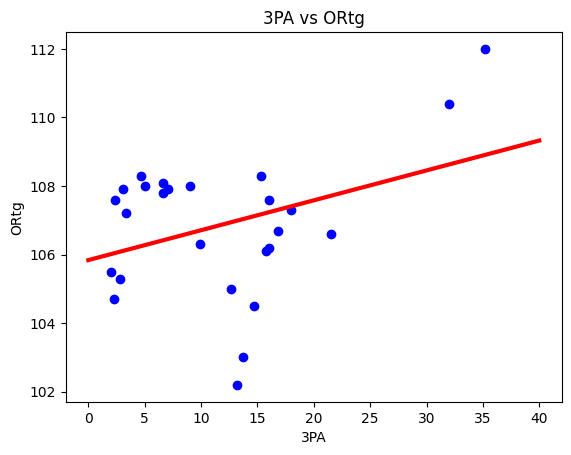

In [ ]:
for label in nba_df.columns[5:]:
  train, valid, test = np.split(nba_df.sample(frac = 1), [int(0.6*len(nba_df)), int(0.8*len(nba_df))])
  d, x_train, y_train = get_xy(train, x_label = '3PA', y_labels = [label])
  d, x_val, y_val = get_xy(valid, x_label = '3PA', y_labels = [label])
  d, x_test, y_test = get_xy(test, x_label = '3PA', y_labels = [label])
  nba_reg.fit(x_train, y_train)
  print("R^2: ", nba_reg.score(x_test, y_test))
  plt.scatter(x_train, y_train, label = 'Data',color = 'blue')
  x = tf.linspace(0,40,100)
  plt.plot(x, nba_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color = 'red', linewidth = 3)
  plt.title("3PA vs " + label)
  plt.ylabel(label)
  plt.xlabel("3PA")
  plt.show()



# Query Data 


In [ ]:
nba_df_query = pd.DataFrame(nba_df)
nba_df_query.head()

,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,41.9,88.2,12.3,34.2,18.5,23.6,10.4,33.0,43.4,25.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,40.6,88.1,12.4,35.2,16.9,21.9,10.3,34.1,44.5,24.6,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,41.2,88.4,12.7,34.6,17.0,21.8,9.8,34.5,44.3,24.8,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,40.9,88.8,12.2,34.1,17.9,23.1,10.1,34.8,44.8,24.4,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,41.1,89.2,11.4,32.0,17.7,23.1,10.3,34.8,45.2,24.6,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


In [ ]:
#Qeury datasets that contain points below 105 and 3PA 
new_result = nba_df_query.query("`PTS` <= 105 and `3PA` >= 10").copy()
new_result.head()

,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
7,38.2,84.6,8.5,24.1,17.7,23.4,10.4,33.3,43.8,22.3,...,102.7,0.452,0.354,0.757,95.8,0.502,13.2,23.8,0.209,106.4
8,37.5,83.6,7.8,22.4,17.1,22.8,10.9,32.4,43.3,22.0,...,100.0,0.449,0.350,0.750,93.9,0.496,13.3,25.1,0.205,105.6
9,37.7,83.0,7.7,21.5,17.8,23.6,10.9,31.8,42.7,22.0,...,101.0,0.454,0.360,0.756,93.9,0.501,13.6,25.5,0.215,106.6
10,37.1,82.0,7.2,20.0,16.7,22.2,11.2,31.0,42.1,22.1,...,98.1,0.453,0.359,0.753,92.0,0.496,13.7,26.5,0.204,105.8
11,36.5,81.4,6.4,18.4,16.9,22.5,11.4,30.8,42.2,21.0,...,96.3,0.448,0.349,0.752,91.3,0.487,13.8,27.0,0.208,104.6


In [ ]:
train, valid, test = np.split(new_result.sample(frac = 1), [int(0.6*len(new_result)), int(0.8*len(new_result))])

In [ ]:
d, x_train_pts3, y_train_pts3 = get_xy(train, x_label = '3PA', y_labels = ['PTS'])
d, x_val_pts3, y_val_pts3 = get_xy(valid, x_label = '3PA', y_labels = ['PTS'])
d, x_test_pts3, y_test_pts3 = get_xy(test, x_label = '3PA', y_labels = ['PTS'])


In [ ]:
pts3_3pa_reg = LinearRegression()
pts3_3pa_reg.fit(x_train_pts3, y_train_pts3)


LinearRegression()

In [ ]:
pts3_3pa_reg.score(x_test_pts3, y_test_pts3)

0.5506051548561977

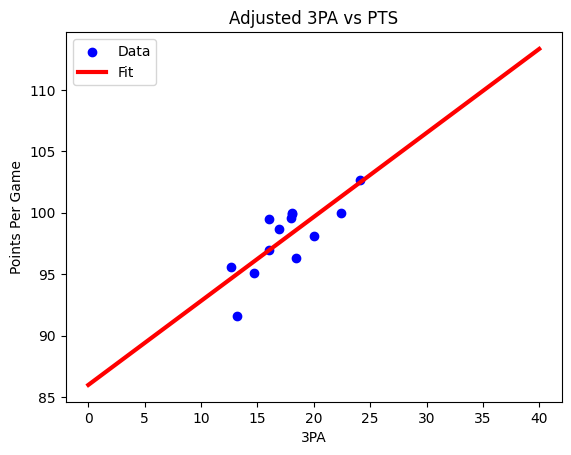

In [ ]:
import tensorflow as tf
plt.scatter(x_train_pts3, y_train_pts3, label = 'Data',color = 'blue')
x = tf.linspace(0, 40, 100)
plt.plot(x, pts3_3pa_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color = 'red', linewidth = 3)
plt.legend()
plt.title("Adjusted 3PA vs PTS")
plt.ylabel("Points Per Game")
plt.xlabel("3PA")
plt.show()

In [ ]:
ncaa_df = pd.read_csv("/content/bigeastncaabasketball.csv")
ncaa_df.head()

,id,year,rank,school,games,wins,losses,win_percentage,conference_wins,conference_losses,...,offensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,opponent_points,simple_rating
0,1,2021,1,Villanova,38,30,8,0.789,16,4,...,10.3,34.8,11.9,6.0,2.2,9.9,14.9,71.7,62.7,19.31
1,2,2021,2,Providence,33,27,6,0.818,14,3,...,10.5,37.6,13.2,5.0,3.7,11.4,16.0,71.5,66.2,13.08
2,3,2021,3,UConn,33,23,10,0.697,13,6,...,13.8,40.4,14.0,5.9,6.4,11.8,16.8,74.8,65.3,16.40
3,4,2021,4,Creighton,35,23,12,0.657,12,7,...,9.6,38.1,13.3,5.5,4.3,14.1,13.6,69.2,66.4,11.34
4,5,2021,5,Marquette,32,19,13,0.594,11,8,...,7.8,34.8,16.0,7.8,5.2,12.4,17.4,74.0,71.6,11.36


In [ ]:
ncaa_df = ncaa_df.drop(['rank','conference_wins','conference_losses','home_wins','home_losses',
                        'away_wins','away_losses', 'defensive_rating','turnovers','personal_fouls'], axis = 1)
ncaa_df.head()

,id,year,school,games,wins,losses,win_percentage,offensive_rating,net_rating,field_goals,...,free_throw_attempts,free_throw_percentage,offensive_rebounds,total_rebounds,assists,steals,blocks,points,opponent_points,simple_rating
0,1,2021,Villanova,38,30,8,0.789,112.4,14.1,24.3,...,16.7,0.830,10.3,34.8,11.9,6.0,2.2,71.7,62.7,19.31
1,2,2021,Providence,33,27,6,0.818,106.4,7.9,24.5,...,20.8,0.728,10.5,37.6,13.2,5.0,3.7,71.5,66.2,13.08
2,3,2021,UConn,33,23,10,0.697,109.9,14.0,26.7,...,18.7,0.753,13.8,40.4,14.0,5.9,6.4,74.8,65.3,16.40
3,4,2021,Creighton,35,23,12,0.657,100.5,4.1,25.6,...,15.3,0.738,9.6,38.1,13.3,5.5,4.3,69.2,66.4,11.34
4,5,2021,Marquette,32,19,13,0.594,102.7,3.3,26.9,...,15.7,0.741,7.8,34.8,16.0,7.8,5.2,74.0,71.6,11.36


In [ ]:
ncaa_df = ncaa_df.groupby(['year'])['3_pointer_attempts'].mean()

In [ ]:
ncaa_df

year
1979          NaN
1980          NaN
1981          NaN
1982     0.600000
1983          NaN
1984          NaN
1985          NaN
1986     8.900000
1987    10.000000
1988    11.611111
1989    12.044444
1990    13.000000
1991    14.390000
1992    14.190000
1993    15.950000
1994    17.000000
1995    17.046154
1996    16.246154
1997    16.900000
1998    16.246154
1999    16.615385
2000    17.642857
2001    18.428571
2002    17.778571
2003    17.128571
2004    18.150000
2005    19.481250
2006    19.281250
2007    18.943750
2008    18.912500
2009    18.550000
2010    17.968750
2011    17.600000
2012    17.166667
2013    18.450000
2014    19.110000
2015    20.170000
2016    20.790000
2017    22.890000
2018    23.620000
2019    22.280000
2020    21.881818
2021    22.309091
Name: 3_pointer_attempts, dtype: float64

In [ ]:
 #pip install sqlalchemy 

In [ ]:
# import sql library
#from sqlalchemy import create_engine

#nba_df.head()
#engine = create_engine('sqlite://', echo = False)
#nba_df.to_sql('NBA_Data', con = engine)

#print(engine.execute("SELECT * FROM NBA_Data").fetchall())


In [ ]:
#df_ex = pd.read_sql_query("SELECT * FROM NBA_Data WHERE 3P > 10", 
                          #con = engine)
#print(df_ex)


In [ ]:
print("i am davian")